### Import Libs ###

In [73]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

### Read Data ###

In [39]:
ydata = pd.read_csv(os.path.join(os.path.pardir, 'data', 'ydata.csv'))

In [41]:
ydata['Date'] = pd.to_datetime(ydata['Date'])
ydata.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


In [42]:
ydata.set_index('Date',inplace=True)
ydata.sort_values('Date', ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


In [43]:
variables = ydata.columns
ydata.isnull().sum().loc[variables]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Explanoatory Data Analysis ##

In [44]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0, 1, 10)))

def correlation(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        asset = df.loc[:,var]
        ax.scatter(df['Adj Close'], asset, c = next(colors))
        ax.set_xlabel('Adj Close')
        ax.set_ylabel('{}'.format(var))
        ax.set_title(var + ' vs Price')
    fig.tight_layout()
    plt.show()

#### Correlation ####

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


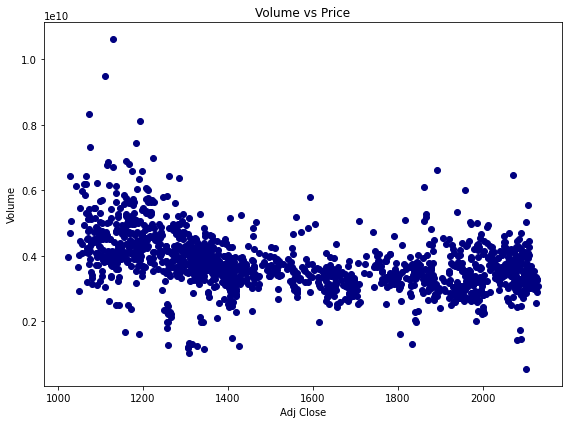

In [45]:
variables = ydata.columns[-1:]
correlation(ydata, variables, 1, 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

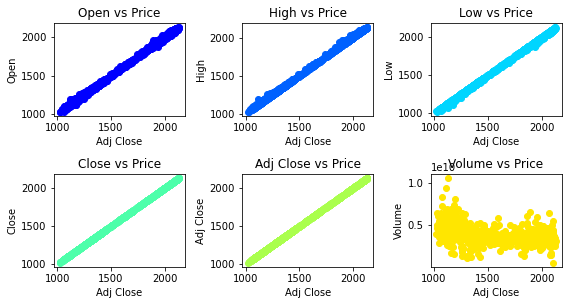

In [46]:
variables = ydata.columns
correlation(ydata, variables, 3, 3)

In [47]:
ydata.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

### Feature Engineering

In [48]:
ydata['high-low_pct'] = (ydata['High'] - ydata['Low']).pct_change()
ydata['wem_5'] = ydata['Close'].ewm(span=5).mean().shift(periods=1)
ydata['price_std_5'] = ydata['Close'].rolling(center=False, window=5).mean().shift(periods=1)

ydata['volume_change'] = ydata['Volume'].pct_change()
ydata['volume_avg_5'] = ydata['Volume'].rolling(center=False, window=5).mean().shift(periods=1)
ydata['volume_close'] = ydata['Volume'].rolling(center=False, window=5).std().shift(periods=1)

#### Correlation with new features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

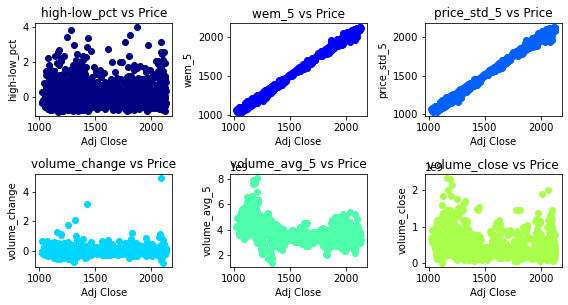

In [49]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

variables = ydata.columns[-6:]
correlation(ydata, variables, 3, 3)

In [50]:
ydata.corr()['Adj Close'].loc[variables]

high-low_pct    -0.010328
wem_5            0.998513
price_std_5      0.998116
volume_change   -0.005446
volume_avg_5    -0.485734
volume_close    -0.241898
Name: Adj Close, dtype: float64

## Build Model

In [51]:
ydata.head(5)

,Open,High,Low,Close,Adj Close,Volume,high-low_pct,wem_5,price_std_5,volume_change,volume_avg_5,volume_close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN


In [52]:
ydata.isnull().sum().loc[variables]

high-low_pct     1
wem_5            1
price_std_5      5
volume_change    1
volume_avg_5     5
volume_close     5
dtype: int64

In [53]:
ydata = ydata.dropna(axis=0)

#### Train / Test split

In [54]:
train = ydata[ydata.index < datetime(year=2015, month=1, day=1)]
test = ydata[ydata.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

In [61]:
lr = LinearRegression()
X_train = train[['high-low_pct', 'wem_5', 'price_std_5', 'volume_avg_5', 'volume_change', 'volume_close']]
Y_train = train['Adj Close']
lr.fit(X_train, Y_train)

LinearRegression()

#### Test Dataset

In [62]:
X_test = test[['high-low_pct', 'wem_5', 'price_std_5', 'volume_avg_5', 'volume_change', 'volume_close']].values
Y_test = test['Adj Close'].values

#### Prediction

In [64]:
close_predictions = lr.predict(X_test)

### Model Evaluation

In [67]:
mae = sum(abs(close_predictions - test['Adj Close'].values)) / test.shape[0]
print(mae)

16.108476204527783


<ipython-input-69-9d3a94f8ec04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


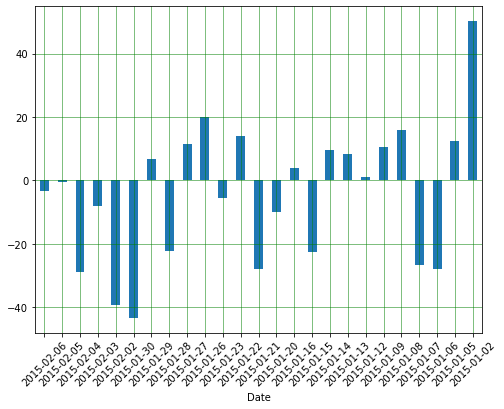

In [69]:
df = pd.DataFrame({'Date':dates, 'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1.set_index('Date', inplace=True)
error = df1['Actual'] - df1['Predicted']

error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

In [71]:
lr.score(X_test, Y_test)

0.8521106711809896

In [79]:

#print('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(Y_test, lr.predict(X_test))))
print('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(Y_test, lr.predict(X_test))))
#print('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(Y_test, lr.predict(X_test))))
#print('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(Y_test, lr.predict(X_test))))

ValueError: continuous is not supported